# Notebook Overview

In this notebook, we perform an Exploratory Data Analysis on a dataset that classifies patients in the ICU that will develop Sepsis and those that will not develop Sepsis


# Set Up



**Installation**

Here is the section where we installed all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
# Installatin of p#ackages
#!pip install numpy
#!pip install pandas
#!pip install patool
#!pip install forex_python
#!pip install pandas_profiling
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

# Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [2]:
# Data handling
import pandas as pd
import numpy as np
from statistics import mean
from forex_python.converter import CurrencyRates
from babel.numbers import format_currency
import datetime as dt


# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn

# Machine learning libraries and metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder, Binarizer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# Other packages
import os
import warnings
warnings.filterwarnings('ignore')
import patoolib
import pickle
from sklearn.pipeline import Pipeline

# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [3]:
test_df= pd.read_csv(r"C:\Users\GilB\OneDrive\Documents\Git Repo\Machine-Learning-API-using-FastAPI\datasets\Paitients_Files_Test.csv")
train_df= pd.read_csv(r"C:\Users\GilB\OneDrive\Documents\Git Repo\Machine-Learning-API-using-FastAPI\datasets\Paitients_Files_Train.csv")                           
                           

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

## Dataset overview

Have a look at the loaded datsets using the following methods: `.head(), .info()`

In [4]:
# A quick look at the shape of our dataset

train_df.shape

(599, 11)

In [5]:
#Lookinag at the head of our dataset

train_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [6]:
#Taking a look at the tail
train_df.tail()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative
598,ICU200608,1,173,74,0,0,36.8,0.088,38,1,Positive


##### Description of Columns 

ID	-	Unique number to represent patient ID

PRG - 	Plasma glucose

PL	-	Blood Work Result-1 (mu U/ml)

PR	-	Blood Pressure (mm Hg) 

SK	-	Blood Work Result-2 (mm)

TS	-   Blood Work Result-3 (mu U/ml)

M11	-	Body mass index (weight in kg/(height in m)^2

BD2	-	Blood Work Result-4 (mu U/ml)

Age	-	patients age (years)

Insurance	- If a patient holds a valid insurance card

Sepssis	Target	Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

In [7]:
#Look at the columns in the dataset and their data types

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [8]:
#Get more details about the features of our data
train_df.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Univariate Analysis

#### Positive Sepssis Cases 

In [9]:
positive_cases = train_df[train_df['Sepssis'] == 'Positive']
positive_cases

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
6,ICU200016,3,78,50,32,88,31.0,0.248,26,0,Positive
8,ICU200018,2,197,70,45,543,30.5,0.158,53,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
588,ICU200598,3,176,86,27,156,33.3,1.154,52,0,Positive
590,ICU200600,11,111,84,40,0,46.8,0.925,45,0,Positive
592,ICU200602,3,132,80,0,0,34.4,0.402,44,0,Positive
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive


In [10]:
No_Positive = positive_cases['Sepssis'].count()
print (f'No of positive cases; {No_Positive}')

No of positive cases; 208


Age

In [11]:
positive_age_stats = positive_cases['Age'].describe()
positive_age_stats 

count    208.000000
mean      36.697115
std       10.904929
min       21.000000
25%       28.000000
50%       35.000000
75%       43.250000
max       67.000000
Name: Age, dtype: float64

In [12]:
positive_mean_age= positive_cases['Age'].mean()
print(f'The average age for patients with Sepssis is {positive_mean_age:.2f}')

The average age for patients with Sepssis is 36.70


In [13]:
highest_positive_age = positive_cases['Age'].max()
print(f'The oldest patient with Sepssis is {highest_positive_age} years old')

The oldest patient with Sepssis is 67 years old


In [14]:
lowest_positive_age = positive_cases['Age'].min()
print(f'The youngest patient with Sepssis is {lowest_positive_age} years old')

The youngest patient with Sepssis is 21 years old


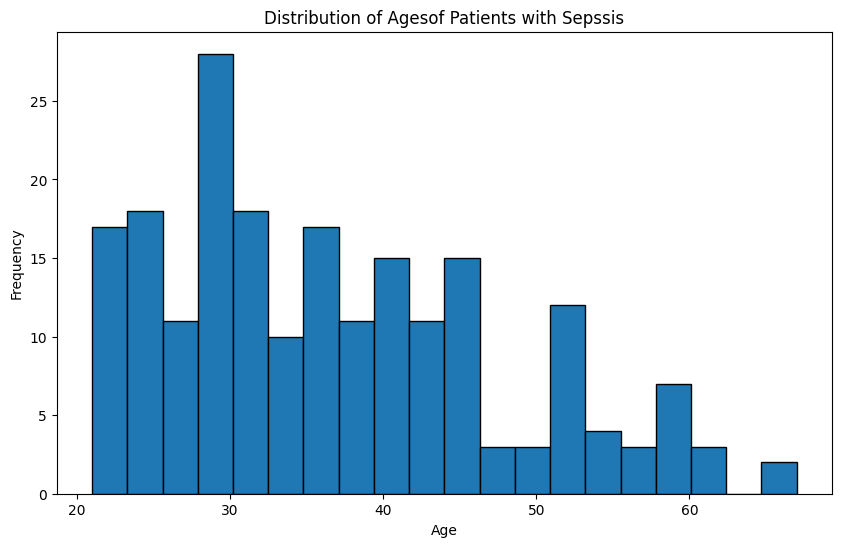

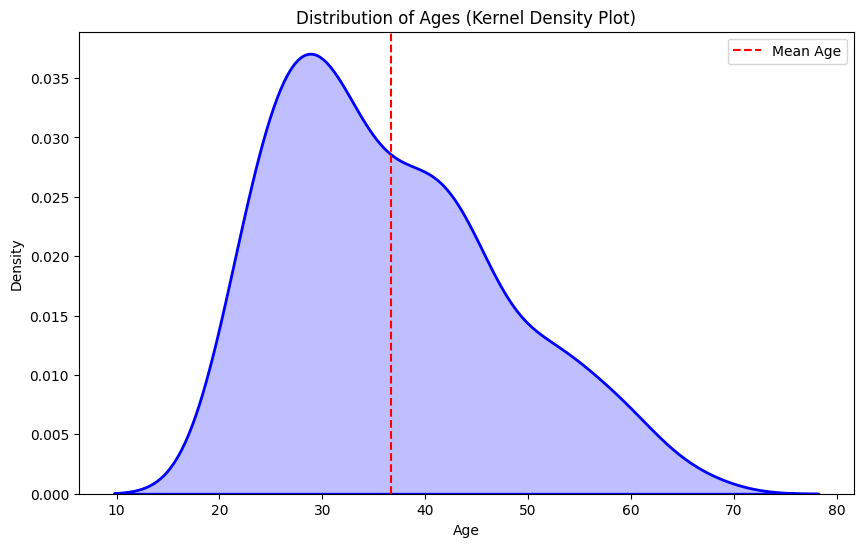

In [26]:
# Extract the 'age' column from the DataFrame
ages = positive_cases['Age']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages of Patients with Sepssis')
plt.show()

# Create a kernel density plot
plt.figure(figsize=(10, 6))
sn.kdeplot(ages, shade=True, color='blue', linewidth=2)
plt.axvline(positive_mean_age, color='red', linestyle='--', label='Mean Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Ages (Kernel Density Plot)')
plt.legend()
plt.show()

BMI

In [15]:
positive_bmi_stats = positive_cases['M11'].describe()
positive_bmi_stats

count    208.000000
mean      35.385577
std        7.195898
min        0.000000
25%       30.975000
50%       34.300000
75%       39.025000
max       67.100000
Name: M11, dtype: float64

In [16]:
positive_mean_bmi = positive_cases['M11'].mean()
print(f'The average BMI for patients with Sepssis is {positive_mean_bmi:.2f}')

The average BMI for patients with Sepssis is 35.39


In [22]:
highest_positive_bmi = positive_cases['M11'].max()
print(f'The highest BMI for a patient with Sepssis is {highest_positive_bmi}')

The highest BMI for a patient with Sepssis is 67.1


In [18]:
lowest_positive_bmi = positive_cases['M11'].min()
print(f'The lowest BMI for a patient with Sepssis is {lowest_positive_bmi}')

The lowest BMI for a patient with Sepssis is 0.0


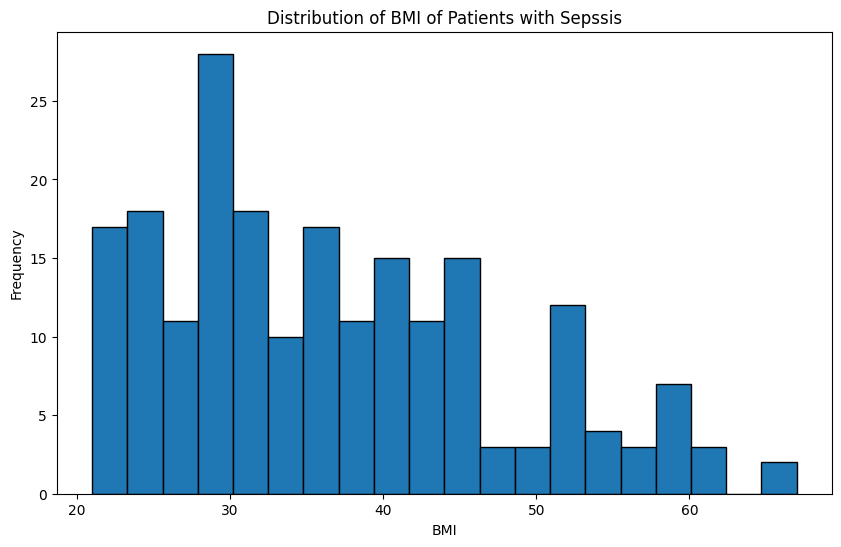

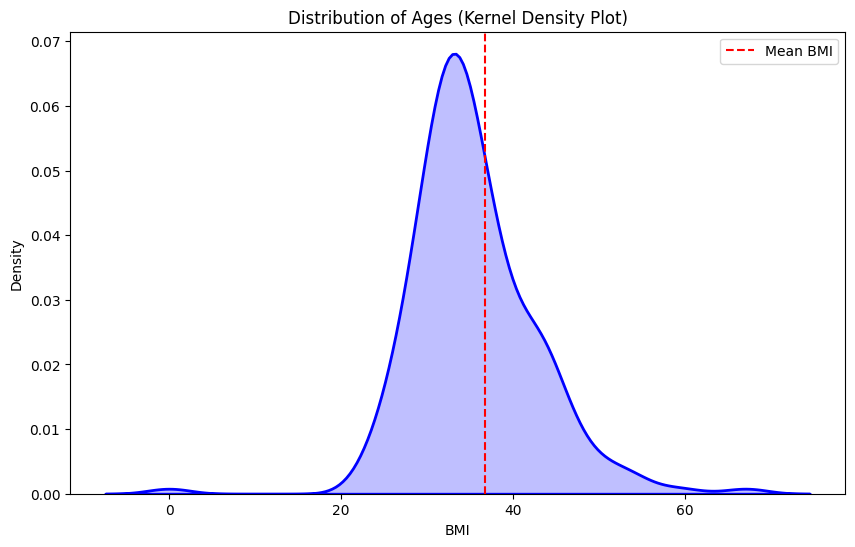

In [27]:
# Extract the BMI 'M11' column from the DataFrame
BMI = positive_cases['M11']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI of Patients with Sepssis')
plt.show()

# Create a kernel density plot
plt.figure(figsize=(10, 6))
sn.kdeplot(BMI, shade=True, color='blue', linewidth=2)
plt.axvline(positive_mean_age, color='red', linestyle='--', label='Mean BMI')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('Distribution of Ages (Kernel Density Plot)')
plt.legend()
plt.show()

### Hypothesis

##### Null Hypothesis 


Age does not determine whether a patient will develop Sepsis

##### Alternate Hypotheiss

Age influences whether a patient will develop Sepsis 

###  Questions

1. Is the train dataset complete?
2. What are the ages of the youngest and oldest patients?
3. What are the youngest and oldest patients with Sepssis?
4. What is the average age ?
5. What is the ratio of patients who are positive for sepssis to the negative patients ?
6. What is the highest and lowest BMI?
7. What is the average BMI ?
8. Is there a corelation between the Sepssis status and the other attributes? 

### Answers

#### 1. Is the train dataset complete

In [19]:
Patients_Train.isnull().sum()

NameError: name 'Patients_Train' is not defined

There are no missing values in the dataset 

#### 2. What are the ages of the youngest and oldest patients

In [ ]:
Patients_Train.sort_values(['Age'], ascending = False, inplace=True)
Patients_Train.head(1)

In [ ]:
Patients_Train.sort_values(['Age'], ascending = False, inplace=True)
Patients_Train.tail(1)

The youngest and oldest patients are 21 and 81 years respectively

#### 3. What are the youngest and oldest patients with Sepssis?